In [2]:
import numpy as np

# Create sample data
X = np.array([
    [1, 2],    # First sample
    [3, 4],    # Second sample
    [5, 6]     # Third sample
])  # shape (3,2)

W = np.array([[0.5], [-0.3]])  # shape (2,1)

print("Shapes:")
print("X shape:", X.shape)    # (3,2)
print("W shape:", W.shape)    # (2,1)

# Correct order: X·W
try:
    result = np.dot(X, W)
    print("\nX·W works!")
    print("Result shape:", result.shape)    # (3,1)
    print("Result:\n", result)
except ValueError as e:
    print("\nX·W failed:", str(e))

# Wrong order: W·X
try:
    result = np.dot(W, X)
    print("\nW·X works!")
    print("Result shape:", result.shape)
except ValueError as e:
    print("\nW·X fails:", str(e))

# To understand why, let's look at the dimension requirements:
print("\nMatrix multiplication requirements:")
print("For X·W:")
print("- X is (3,2)")
print("- W is (2,1)")
print("- Inner dimensions match: 2 == 2")
print("- Result is (3,1)")

print("\nFor W·X:")
print("- W is (2,1)")
print("- X is (3,2)")
print("- Inner dimensions don't match: 1 != 3")
print("- Cannot multiply!")

Shapes:
X shape: (3, 2)
W shape: (2, 1)

X·W works!
Result shape: (3, 1)
Result:
 [[-0.1]
 [ 0.3]
 [ 0.7]]

W·X fails: shapes (2,1) and (3,2) not aligned: 1 (dim 1) != 3 (dim 0)

Matrix multiplication requirements:
For X·W:
- X is (3,2)
- W is (2,1)
- Inner dimensions match: 2 == 2
- Result is (3,1)

For W·X:
- W is (2,1)
- X is (3,2)
- Inner dimensions don't match: 1 != 3
- Cannot multiply!


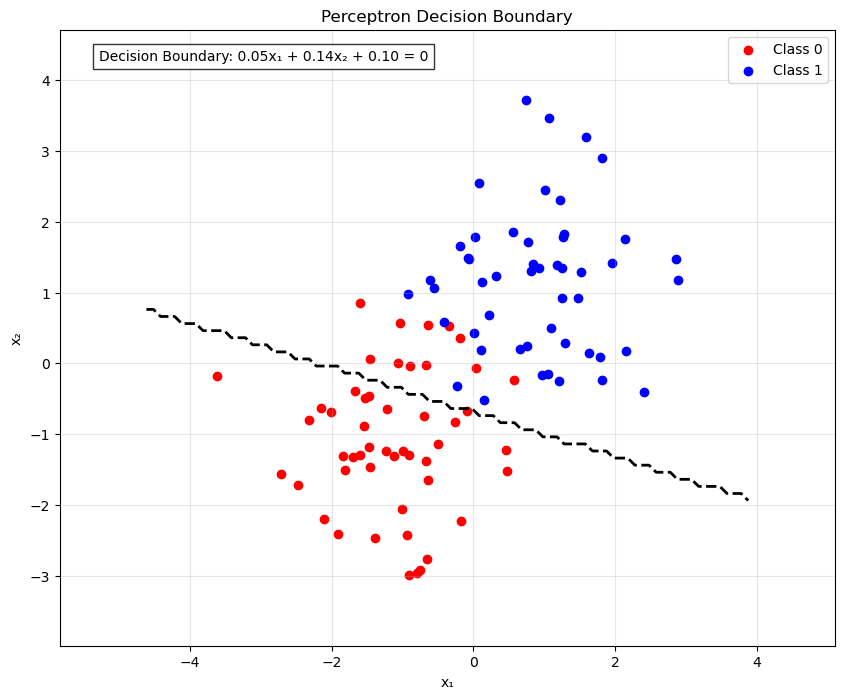

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Learning
        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                # Activation function (step function)
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = 1 if linear_output >= 0 else 0
                
                # Perceptron update rule
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
                
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

# Generate synthetic dataset
np.random.seed(42)
n_samples = 100

# Generate Class 0: points below the line
X0 = np.random.randn(n_samples//2, 2) - 1
y0 = np.zeros(n_samples//2)

# Generate Class 1: points above the line
X1 = np.random.randn(n_samples//2, 2) + 1
y1 = np.ones(n_samples//2)

# Combine datasets
X = np.vstack((X0, X1))
y = np.hstack((y0, y1))

# Create and train perceptron
perceptron = Perceptron(learning_rate=0.1, n_iterations=100)
perceptron.fit(X, y)

# Plotting
def plot_decision_boundary():
    plt.figure(figsize=(10, 8))
    
    # Plot the data points
    plt.scatter(X0[:, 0], X0[:, 1], color='red', label='Class 0')
    plt.scatter(X1[:, 0], X1[:, 1], color='blue', label='Class 1')
    
    # Create a mesh grid to visualize the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))
    
    # Make predictions on the mesh grid
    Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contour(xx, yy, Z, colors='k', levels=[0.5], linestyles='--', linewidths=2)
    
    plt.xlabel('x₁')
    plt.ylabel('x₂')
    plt.title('Perceptron Decision Boundary')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    
    # Print the equation of the decision boundary
    w1, w2 = perceptron.weights
    b = perceptron.bias
    equation = f'Decision Boundary: {w1:.2f}x₁ + {w2:.2f}x₂ + {b:.2f} = 0'
    plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, 
             bbox=dict(facecolor='white', alpha=0.8))
    
    plt.show()

# Display the plot
plot_decision_boundary()